Engy-5050 Spring 2022 UMass Lowell; Prof. V. F. de Almeida **14Jan2022**

# 08. Bare Slab Criticality
In Progress
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Dmtrx}{\boldsymbol{\mathsf{D}}}
  \newcommand{\Gmtrx}{\boldsymbol{\mathsf{G}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
  \newcommand{\Ecal}{\mathcal{E}}
$

---
## Table of Contents<a id="toc"></a>
* [Objectives](#obj)
1. [Poisson Problem with Symmetry/Vacuum Boundary Conditions](#p1)
1. [Alternative Problem Statement](#p2)
1. [Galerkin's Method w/ Finite Element Basis Functions](#p3)
1. [Reflected Source](#reflected)
   + [Data](#data)
   + [Finite Element Lagrange Basis Functions](#fembf)
   + [Results](#results)
---

### [Boundary-Value Problem Statement](#toa)<a id="poisson"></a>

Solve the neutron flux intensity criticality problem. Find $u:[a,b]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\bigl(-D\, u'\bigr)'(x) + \bigl(\frac{1}{k}\nu\Sigma_f - \Sigma_a\bigr)\,u(x) &= 0 \quad\quad \forall \quad\quad x\in\ ]a,b[, \\
 u'(a) &= 0, \\
 u(b) &= 0.
\end{align*}
   
Given data: diffusion coefficient, $D$, macroscopic fission cross section, $\Sigma_f$, average number of neutrons per fission, $\nu$, neutron multiplication factor, $k$, and macroscopic absorption cross section, $\Sigma_a$.

### <span style="color:blue">[1.1)](#toa)(10 pts) Describe a Rayleigh-Ritz or Galerkin Finite element method formulation for the above eigenvalue problem, and show the algebraic problem to be solved.
</span><a id="a11"></a>

The Rayleigh-Ritz method for computing an approximate solution to the above mentioned Poisson problem is: find $u^*_N \in V_N(a,b)\subset V(a,b) = \bigl\{ u:[a,b]\subset\Reals\rightarrow\Reals \bigr\}$ such that it minimizes the Poisson energy norm:

\begin{equation*}
  \norm{u-u^*_N}^2_{\Ecal} = \min\limits_{u_N\, \in\, V_N} \norm{u-u_N}^2_{\Ecal},
\end{equation*}

where 
$V_N(a,b) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i \mid u_N(b) = 0, (u'_N,u'_N) < \infty \bigr\}$
and $\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(a,b)$.

The optimum coefficients $\cvec^* := \{c_i\mid i=1,\ldots,N\}$ solve

\begin{equation*}
  \overset{(N\times N)}{\Amtrx} \,\overset{(N\times 1)}{\cvec^*}  = 
  \biggl(\overset{(N\times N)}{\Dmtrx} - \lambda\,\overset{(N\times N)}{\Gmtrx}\biggr)\,\overset{(N\times 1)}{\cvec^*} = \overset{(N\times 1)}\zerovec ,
\end{equation*}

where:
  + $A_{i,j} = D\,(\phi'_j,\phi'_i) - \lambda\,(\phi_j,\phi_i)$
  
and $\lambda = \frac{1}{k}\nu\Sigma_f - \Sigma_a$ or $k = \frac{\nu\Sigma_f}{\lambda + \Sigma_a}$.
  
This formulation only accommodates basis functions that satisfy the homogeneous boundary conditions. The problem is referred to as a *generalized eigenvalue problem*.

### <span style="color:blue">[1.2)](#toa)(15 pts) Given the data below, use your own finite element program to compute the largest 5 eigenvalues accurately.
</span><a id="a12"></a>

### [Data](#toa)<a id="data"></a>

Solve problem with parameter values:

> + a = 0 cm
> + b = 10.0 cm
> + D = 1.44 cm
> + $\Sigma_a$ = 0.1 cm^-1
> + $\Sigma_f$ = 0.1 cm^-1
> + $\nu$ = 2.4355

In [1]:
'''SI units'''
from scipy import constants as unit
unit.second = 1.0
unit.meter = 1.0
unit.cm = unit.centi*unit.meter

In [2]:
'''Domain'''
x_a = 0
x_b = 10*unit.cm

In [3]:
'''Parameters and data'''
diffusion_coeff_fuel = 1.44*unit.cm
sigma_a_fuel = 0.1/unit.cm
sigma_f_fuel = 0.1/unit.cm
nu = 2.4355 # average # of neutrons per fission
# sanity check
assert sigma_a_fuel >= sigma_f_fuel

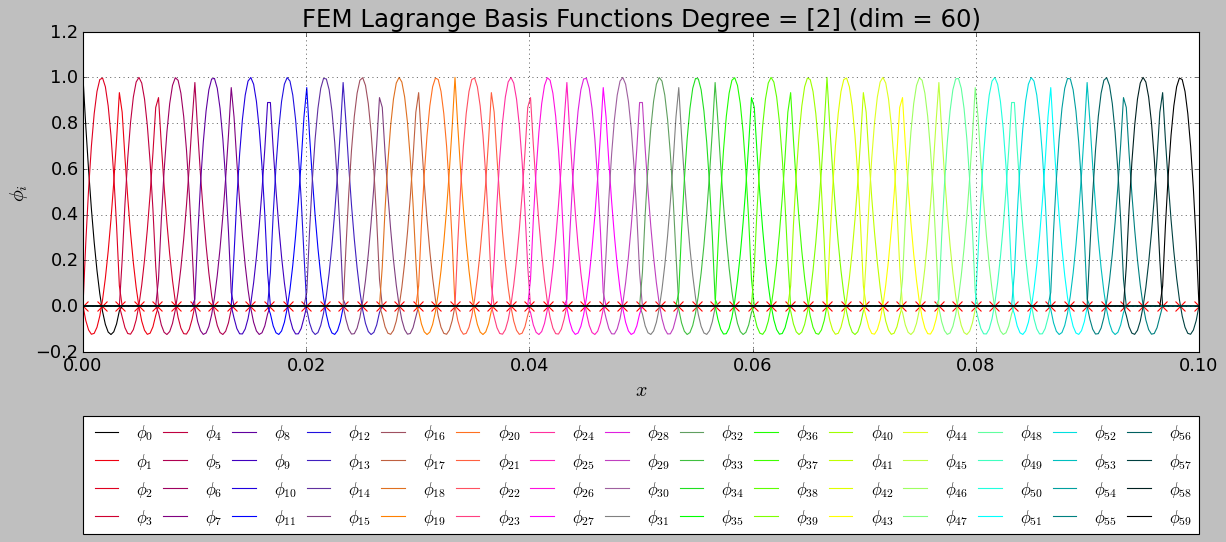

In [7]:
'''Build the basis functions'''

from engy_5310.toolkit import LagrangeFEMBasis 

degree = 2
n_elem = [30] 

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, x_b], bc_x_max='dirichlet')
femlb.plot(n_plot_pts=400, n_legend_cols=15)

  + $A_{i,j} = D\,(\phi'_j,\phi'_i) - \lambda\,(\phi_j,\phi_i)$

In [ ]:
'''Build the matrix of coefficients of the linear system'''
# Keep as documentation

#def slow_build_matrices(femlb, one_over_delta=0.0):
    import numpy as np
    n = len(femlb.basis_func_list)
    d_mtrx = np.zeros((n, n), dtype=np.float64)
    g_mtrx = np.zeros((n, n), dtype=np.float64)
  
    for i,phi_prime_i in enumerate(femlb.basis_func_prime_list):
        phi_i = femlb.basis_func_list[i]
        for j,phi_prime_j in enumerate(femlb.basis_func_prime_list):
            phi_j = femlb.basis_func_list[j]
        
            diff_coeff_fuel_phi_prime_j = lambda x: diffusion_coeff_fuel * phi_prime_j(x)
            (d_ij, _) = femlb.inner_product(diff_coeff_fuel_phi_prime_j, phi_prime_i)
            d_mtrx[i,j] = d_ij
            
            d_mtrx[i,j] += diffusion_coeff_fuel*one_over_delta * phi_j(x_b) * phi_i(x_b)
        
            (g_ij, _) = femlb.inner_product(phi_j, phi_i)
            g_mtrx[i,j] = g_ij
    
    return (d_mtrx, g_mtrx)

In [ ]:
#(d_mtrx, g_mtrx) = build_matrices(femlb)

In [8]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(lambda x: diffusion_coeff_fuel, "u'", "v'")
g_mtrx = femlb.inner_product_matrix(lambda x:1.0, 'u', 'v')

In [9]:
try:    
    from engy_5310.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(d_mtrx) == min(d_mtrx.shape):
    print('D is full rank.')
else:
    print('D is rank deficient.')

if matrix_rank(g_mtrx) == min(g_mtrx.shape):
    print('G is full rank.')
else:
    print('G is rank deficient.')

D is full rank.
G is full rank.


In [10]:
'''Compute optimal coefficient eigenvectors'''
import scipy
lambda_vec, eigen_vec = scipy.linalg.eigh(d_mtrx, g_mtrx)

In [14]:
import numpy as np
np.set_printoptions(precision=5)
print('lambda = ', lambda_vec[:5])
print('Buckling (material) = ', np.sqrt(lambda_vec[:5]/diffusion_coeff_fuel))

lambda =  [  3.55306  31.97755  88.82702 174.10415 287.81715]
Buckling (material) =  [ 15.70796  47.12391  78.54007 109.95711 141.37646]


In [15]:
k_vec = nu*sigma_f_fuel/(lambda_vec+sigma_a_fuel)

In [16]:
'''Eigenvalues'''
import numpy as np
np.set_printoptions(precision=5)
print('k = ',k_vec[:5])

k =  [1.79701 0.58019 0.24644 0.13229 0.08178]


### <span style="color:blue">[1.3)](#toa)(10 pts) Show results for the fundamental mode as below.
</span><a id="a13"></a>

In [17]:
'''Build the best approximation function in V_N'''

def u_star(x, c_star_vec):
    u_0 = femlb.evaluation_matrix(x)@c_star_vec
    return u_0

In [18]:
'''Build the derivative '''

def u_prime_star(x, c_star_vec):
    u_0 = femlb.evaluation_matrix(x, derivative=True)@c_star_vec
    return u_0

In [19]:
'''Build the best approximation function in V_N'''

def u_flux_x(x, c_star_vec):
    return -diffusion_coeff_fuel*u_prime_star(x, c_star_vec)

In [20]:
'''Table of results for the fundamental mode'''

x_table = np.linspace(x_a, x_b, 20)

c_star_vec = eigen_vec[:,0]/scipy.linalg.norm(eigen_vec[:,0])
u_values = u_star(x_table, c_star_vec)
(normalizing_val, ) = np.where(np.abs(u_values) == np.abs(u_values).max())
u_values /= u_values[normalizing_val[0]]

flux_values = u_flux_x(x_table, c_star_vec)
(normalizing_val, ) = np.where(np.abs(flux_values) == np.abs(flux_values).max())
flux_values /= flux_values[normalizing_val[0]]

print('k = %2.5e'%k_vec[0])
print('')

print("   x [cm]        u [a.u.]      -D u'_x [a.u.]")
for i,(x,t,q)in enumerate(zip(x_table, u_values, flux_values)):
    print('%2i)'%(i+1), ' %2.2f'%(x/unit.cm), '       %3.5f'%t, '      %3.5f'%q)

k = 1.79701e+00

   x [cm]        u [a.u.]      -D u'_x [a.u.]
 1)  0.00        1.00000       0.00000
 2)  0.53        0.99658       0.08255
 3)  1.05        0.98636       0.16457
 4)  1.58        0.96940       0.24542
 5)  2.11        0.94582       0.32460
 6)  2.63        0.91577       0.40164
 7)  3.16        0.87947       0.47578
 8)  3.68        0.83717       0.54691
 9)  4.21        0.78914       0.61402
10)  4.74        0.73572       0.67713
11)  5.26        0.67728       0.73556
12)  5.79        0.61421       0.78889
13)  6.32        0.54695       0.83711
14)  6.84        0.47595       0.87917
15)  7.37        0.40169       0.91566
16)  7.89        0.32470       0.94554
17)  8.42        0.24548       0.96914
18)  8.95        0.16460       0.98618
19)  9.47        0.08258       0.99625
20)  10.00        0.00000       1.00000


In [21]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u_N(a) = ', -u_star(x_a, c_star_vec), ' u_N(b) = ', -u_star(x_b, c_star_vec))

u_N(a) =  [-0.18107]  u_N(b) =  [-0.]


In [22]:
left_flux = (float(u_flux_x(x_a, c_star_vec)), 0.0)
normal = np.array((-1,0))

left_normal_flux = np.dot(np.array(left_flux), normal)
left_normal_flux

-1.959420646471699e-07

In [23]:
right_flux = (float(u_flux_x(x_b, c_star_vec)), 0.0)
normal = np.array((1,0))

right_normal_flux = np.dot(np.array(right_flux), normal)
right_normal_flux

0.04096676135879988

In [24]:
from scipy.integrate import quad
source = lambda x: lambda_vec[0] * u_star(x, c_star_vec)
(total_power, _) = quad(source, x_a, x_b)
total_power

0.04095740622884251

In [25]:
'''Total flux balance'''

print('Total flux balance relative error [%%] = %2.2f '%(100*(left_normal_flux + right_normal_flux - total_power)/total_power))

Total flux balance relative error [%] = 0.02 


In [26]:
'''Plot neutron flux modes'''
from engy_5310.toolkit import color_map

def plot_modes(k_vec, eigen_vec):

    k_vec = k_vec.round(5)
    n_pts = 300
    x = np.linspace(x_a, x_b, n_pts)
    
    
    import matplotlib.pyplot as plt
    plt.style.use('classic')
    (fig, ax1) = plt.subplots(1, figsize=(14, 5))
    ax2 = ax1.twinx()
    
    colors = color_map(k_vec.shape[0])

    for j,k in enumerate(k_vec):
        c_star_vec = eigen_vec[:,j]/scipy.linalg.norm(eigen_vec[:,j])
        
        u_values = u_star(x, c_star_vec)
        (normalizing_val, ) = np.where(np.abs(u_values) == np.abs(u_values).max())
        u_values /= u_values[normalizing_val[0]]

        u_flux_x_values = u_flux_x(x, c_star_vec)
        (normalizing_val, ) = np.where(np.abs(u_flux_x_values) == np.abs(u_flux_x_values).max())
        u_flux_x_values /= u_flux_x_values[normalizing_val[0]]

        ax1.plot(x/unit.cm, u_values, '-', label=r'Flux $k$=%2.2f'%k, color=colors[j])
        
        ax1.set_xlabel(r'$x$ [cm]', fontsize=18)
        ax1.set_ylabel(r'$u_N$ [a.u.]', fontsize=18, color='black')
        ax1.tick_params(axis='y', labelcolor='black', labelsize=16)
        ax1.tick_params(axis='x', labelsize=16)
        ax1.legend(loc='upper left', fontsize=12)
        ax1.grid(True)
        
        ax2.plot(x/unit.cm, u_flux_x_values,'--', color=colors[j], label='Current $k$=%2.2f'%k)

        ax2.set_ylabel(r"$-D\,u'_N$ [a.u.]", fontsize=16, color='black')
        ax2.tick_params(axis='y', labelcolor='black', labelsize=16)
        ax2.legend(loc='upper right', fontsize=12)
        
    plt.title(r'Bare Fuel Slab Modes ($k$=%s # elem=%s, N=%i)'%(str(list(k_vec)),n_elem,len(femlb.basis_func_list)), fontsize=20)
    plt.show()

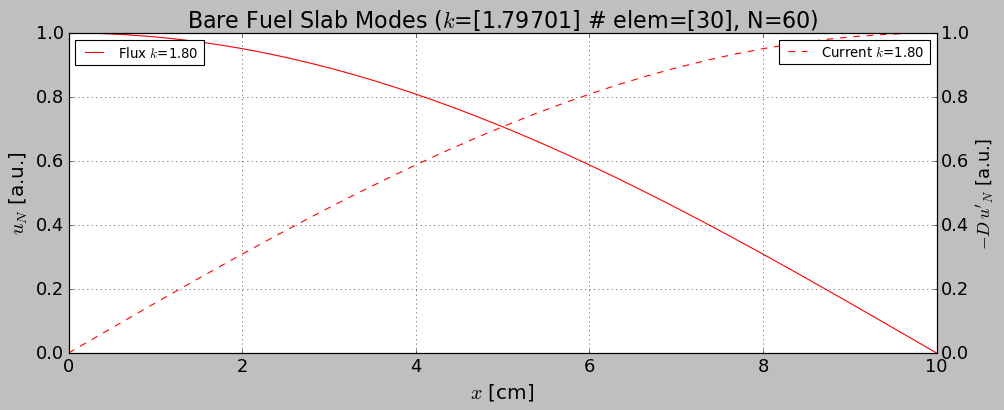

In [27]:
plot_modes(k_vec[0:1], eigen_vec[:,0:1])

### <span style="color:blue">[1.4)](#toa)(10 pts) Show the following results for the remaining modes.
</span><a id="a14"></a>

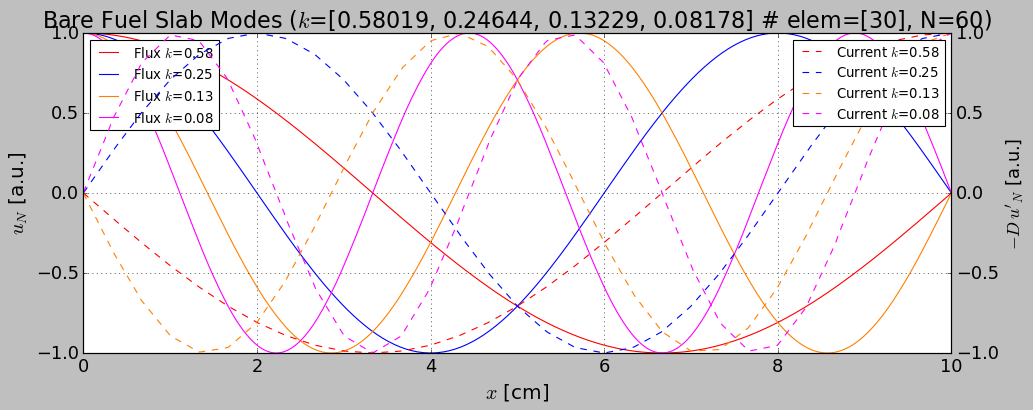

In [28]:
plot_modes(k_vec[1:5], eigen_vec[:,1:5])

### <span style="color:blue">[1.5)](#toa)(5 pts) Compute the critical value of $\Sigma_f$ (leaving $D$ and $\Sigma_a$ unchanged) and demonstrate criticality.
</span><a id="a15"></a>

In [29]:
'''Sigma_f critical'''
sigma_f_fuel_critical = sigma_f_fuel / k_vec[0]
print('Sigma_f critical = %2.4e [1/cm]'%(sigma_f_fuel_critical*unit.cm))
print('Fission relaxation length = %2.4e [cm]'%(1/(sigma_f_fuel_critical*unit.cm)))

Sigma_f critical = 5.5648e-02 [1/cm]
Fission relaxation length = 1.7970e+01 [cm]


In [30]:
k_vec = nu*sigma_f_fuel_critical/(lambda_vec+sigma_a_fuel)

In [31]:
'''Critical Eigenvalues'''
import numpy as np
np.set_printoptions(precision=5)
print('k = ',k_vec[:5])

k =  [1.      0.32286 0.13714 0.07362 0.04551]


### [Boundary-Value Problem Statement](#toa)<a id="poisson"></a>

Solve the neutron flux intensity criticality problem. Find $u:[a,b]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\bigl(-D\, u'\bigr)'(x) + \bigl(\frac{1}{k}\nu\Sigma_f - \Sigma_a\bigr)\,u(x) &= 0 \quad\quad \forall \quad\quad x\in\ ]a,b[, \\
 u'(a) &= 0, \\
 -D\,u'(b) &= \frac{D}{\delta}\,u(b).
\end{align*}
   
Given data: diffusion coefficient, $D$, macroscopic fission cross section, $\Sigma_f$, average number of neutrons per fission, $\nu$, neutron multiplication factor, $k$, macroscopic absorption cross section, $\Sigma_a$, and the extrapolation distance, $\delta$, in the $x$ direction.

### <span style="color:blue">[2.1)](#toa)(10 pts) Describe a Rayleigh-Ritz or Galerkin Finite element method formulation for the above eigenvalue problem, and show the algebraic problem to be solved.
</span><a id="a21"></a>

The Rayleigh-Ritz method for computing an approximate solution to the above mentioned Poisson problem is: find $u^*_N \in V_N(a,b)\subset V(a,b) = \bigl\{ u:[a,b]\subset\Reals\rightarrow\Reals \bigr\}$ such that it minimizes the Poisson energy norm:

\begin{equation*}
  \norm{u-u^*_N}^2_{\Ecal} = \min\limits_{u_N\, \in\, V_N} \norm{u-u_N}^2_{\Ecal},
\end{equation*}

where 
$V_N(a,b) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i \mid (u'_N,u'_N) < \infty \bigr\}$
and $\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(a,b)$.

The optimum coefficients $\cvec^* := \{c_i\mid i=1,\ldots,N\}$ solve

\begin{equation*}
  \overset{(N\times N)}{\Amtrx} \,\overset{(N\times 1)}{\cvec^*}  = 
  \biggl(\overset{(N\times N)}{\Dmtrx} - \lambda\,\overset{(N\times N)}{\Gmtrx}\biggr)\,\overset{(N\times 1)}{\cvec^*} = \overset{(N\times 1)}\zerovec ,
\end{equation*}

where:
  + $A_{i,j} = D\,(\phi'_j,\phi'_i) - \lambda\,(\phi_j,\phi_i) + \frac{D}{\delta}\phi_j(b)\,\phi_i(b)$
  
and $\lambda = \frac{1}{k}\nu\Sigma_f - \Sigma_a$ or $k = \frac{\nu\Sigma_f}{\lambda + \Sigma_a}$.
  
This formulation only accommodates basis functions that satisfy the homogeneous boundary conditions.

### <span style="color:blue">[2.2)](#toa)(15 pts) Given the data below and using your own finite element program, compute the largest 5 eigenvalues accurately.
</span><a id="a22"></a>

### [Data](#toa)<a id="data"></a>

Solve problem with the same parameters as before and:

> + $\delta$ = 1 cm

In [32]:
'''Parameters and data'''

delta = 1*unit.cm

In [34]:
'''Build the basis functions'''

from engy_5310.toolkit import LagrangeFEMBasis 

degree = 2
n_elem = [30] 

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, x_b])
#femlb.plot(n_plot_pts=400)

  + $A_{i,j} = D\,(\phi'_j,\phi'_i) - \lambda\,(\phi_j,\phi_i) + \frac{D}{\delta}\phi_j(b)\,\phi_i(b)$

In [ ]:
#(d_mtrx, g_mtrx) = slow_build_matrices(femlb, 1/delta)

In [35]:
d_mtrx = femlb.inner_product_matrix(lambda x: diffusion_coeff_fuel, "u'", "v'")
d_mtrx += femlb.boundary_inner_product_matrix('right', lambda x: diffusion_coeff_fuel/delta, 'u', 'v')
g_mtrx = femlb.inner_product_matrix(lambda x:1.0, 'u', 'v')

In [36]:
try:    
    from engy_5310.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(d_mtrx) == min(d_mtrx.shape):
    print('D is full rank.')
else:
    print('D is rank deficient.')

if matrix_rank(g_mtrx) == min(g_mtrx.shape):
    print('G is full rank.')
else:
    print('G is rank deficient.')

D is full rank.
G is full rank.


In [37]:
'''Compute optimal coefficient eigenvectors'''
import scipy
lambda_vec, eigen_vec = scipy.linalg.eigh(d_mtrx, g_mtrx)

In [38]:
import numpy as np
np.set_printoptions(precision=5)
print('lambda = ', lambda_vec[:5])
print('Buckling (material) = ', np.sqrt(lambda_vec[:5]/diffusion_coeff_fuel))

lambda =  [  2.94     26.69751  75.23393 149.82782 251.45726]
Buckling (material) =  [ 14.2887   43.05802  72.28125 102.00348 132.14503]


In [39]:
k_vec = nu*sigma_f_fuel/(lambda_vec+sigma_a_fuel)

In [40]:
'''Eigenvalues'''
np.set_printoptions(precision=5)
print('k = ',k_vec[:5])

k =  [1.88215 0.66367 0.28574 0.15238 0.09315]


### <span style="color:blue">[2.3)](#toa)(10 pts) Show results for the fundamental mode as below.
</span><a id="a23"></a>

In [41]:
'''Table of results for the fundamental mode'''

x_table = np.linspace(x_a, x_b, 20)

c_star_vec = eigen_vec[:,0]/scipy.linalg.norm(eigen_vec[:,0])

u_values = u_star(x_table, c_star_vec)
(normalizing_val, ) = np.where(np.abs(u_values) == np.abs(u_values).max())
u_values /= u_values[normalizing_val[0]]

flux_values = u_flux_x(x_table, c_star_vec)
(normalizing_val, ) = np.where(np.abs(flux_values) == np.abs(flux_values).max())
flux_values /= flux_values[normalizing_val[0]]

print('k = %2.5e'%k_vec[0])
print('')

print("   x [cm]        u [a.u.]      -D u'_x [a.u.]")
for i,(x,t,q)in enumerate(zip(x_table, u_values, flux_values)):
    print('%2i)'%(i+1), ' %2.2f'%(x/unit.cm), '       %3.5f'%t, '      %3.5f'%q)

k = 1.88215e+00

   x [cm]        u [a.u.]      -D u'_x [a.u.]
 1)  0.00        1.00000       0.00000
 2)  0.53        0.99717       0.07588
 3)  1.05        0.98871       0.15134
 4)  1.58        0.97466       0.22592
 5)  2.11        0.95510       0.29923
 6)  2.63        0.93013       0.37091
 7)  3.16        0.89991       0.44037
 8)  3.68        0.86461       0.50752
 9)  4.21        0.82441       0.57158
10)  4.74        0.77956       0.63257
11)  5.26        0.73030       0.68994
12)  5.79        0.67691       0.74335
13)  6.32        0.61969       0.79277
14)  6.84        0.55897       0.83737
15)  7.37        0.49509       0.87757
16)  7.89        0.42842       0.91254
17)  8.42        0.35932       0.94249
18)  8.95        0.28819       0.96715
19)  9.47        0.21543       0.98617
20)  10.00        0.14145       1.00000


In [42]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u_N(a) = ', -u_star(x_a, c_star_vec), ' u_N(b) = ', -u_star(x_b, c_star_vec))

u_N(a) =  [0.1729]  u_N(b) =  [0.02446]


In [43]:
left_flux = (float(u_flux_x(x_a, c_star_vec)), 0.0)
normal = np.array((-1,0))

left_normal_flux = np.dot(np.array(left_flux), normal)
left_normal_flux

1.281115738038352e-07

In [44]:
right_flux = (float(u_flux_x(x_b, c_star_vec)), 0.0)
normal = np.array((1,0))

right_normal_flux = np.dot(np.array(right_flux), normal)
right_normal_flux

-0.035225240482398154

In [45]:
from scipy.integrate import quad
source = lambda x: lambda_vec[0] * u_star(x, c_star_vec)
(total_power, _) = quad(source, x_a, x_b)
total_power

-0.03521860203313771

In [46]:
'''Total flux balance'''

print('Total flux balance relative error [%%] = %2.2f '%(100*(left_normal_flux + right_normal_flux - total_power)/total_power))

Total flux balance relative error [%] = 0.02 


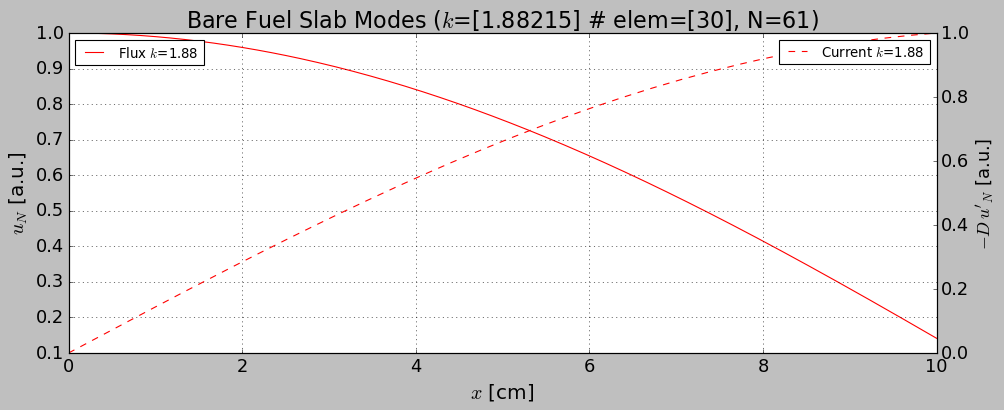

In [47]:
plot_modes(k_vec[0:1], np.abs(eigen_vec[:,0:1]))

### <span style="color:blue">[2.4)](#toa)(10 pts) Show the following results for the remaining modes.
</span><a id="a24"></a>

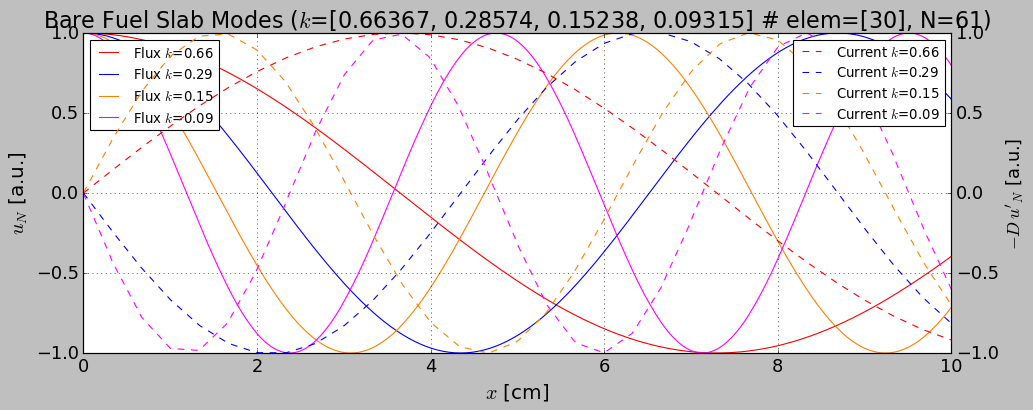

In [48]:
plot_modes(k_vec[1:5], eigen_vec[:,1:5])

### <span style="color:blue">[2.5)](#toa)(10 pts) Compute the critical value of $\Sigma_f$ (leaving $D$ and $\Sigma_a$ unchanged) and demonstrate criticality.
</span><a id="a25"></a>

In [49]:
'''Sigma_f critical'''
sigma_f_fuel_critical = sigma_f_fuel / k_vec[0]
print('Sigma_f critical = %2.4e [1/cm]'%(sigma_f_fuel_critical*unit.cm))
print('Fission relaxation length = %2.4e [cm]'%(1/(sigma_f_fuel_critical*unit.cm)))

Sigma_f critical = 5.3131e-02 [1/cm]
Fission relaxation length = 1.8821e+01 [cm]


In [50]:
k_vec = nu*sigma_f_fuel_critical/(lambda_vec+sigma_a_fuel)

In [51]:
'''Critical Eigenvalues'''
import numpy as np
np.set_printoptions(precision=5)
print('k = ',k_vec[:5])

k =  [1.      0.35261 0.15182 0.08096 0.04949]
